In [1]:
# Importing necessary libraries
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string 
import spacy

!pip install WordCloud
from wordcloud import WordCloud
%matplotlib inline 



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Reading the file using pandas library
data=pd.read_csv(r'C:\Users\PRJAWAL\OneDrive\Desktop\DATA SCIENCE\DS-Projects\Sentiment-Analysis\reviews.csv')  
data

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0
...,...,...,...
320,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
321,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
322,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
323,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


EDA : Exploratory Data Analysis

In [3]:
data.shape

(325, 3)

In [ ]:
data.columns

Index(['headline', 'reviewBody', 'ratingValue'], dtype='object')

In [5]:
data.isnull().sum()

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

14

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,ratingValue
count,305.000000
mean,4.350820
std,1.102423
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
data['Review']=data['headline']+' '+data['reviewBody']
data

,headline,reviewBody,ratingValue,Review
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,Super light and efficient laptop Super light a...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,NEW laptop is great so far I am loving the new...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,Lightweight powerhouse. Great build quality \ ...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,Great Laptop for Work Excellent laptop for wor...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,"Practical Solid Laptop So far so good, I like ..."
...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,Faulty motherboard Dell sent me a laptop with ...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,"Dead on arrival Laptop dead on arrival, still ..."
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,"Bad Quality Bad Quality, overheating, and keyb..."
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,Hassles with installation of Win 11 Laptop did...


In [12]:
data.dtypes

headline        object
reviewBody      object
ratingValue    float64
Review          object
dtype: object

In [13]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# Text preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Removing Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    word_tokens = word_tokenize(text)
    
    # Removing Stop Words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in word_tokens if word not in stop_words]
    
    # Lemmatization
    doc = nlp(' '.join(filtered_words))
    lemmatized_words = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_words)
data['Review']=data['Review'].apply(preprocess_text)
data['Review']

0      super light efficient laptop super light effic...
1      new laptop great far love new look feel new la...
2      lightweight powerhouse great build quality exc...
3      great laptop work excellent laptop work proces...
4      practical solid laptop far good like hdmi usbc...
                             ...                        
300    faulty motherboard dell send laptop faulty mot...
301    dead arrival laptop dead arrival still wait re...
302    bad quality bad quality overheat keyboardtrack...
303    hassles installation win 11 laptop come requir...
304    break device laptop break customer support hel...
Name: Review, Length: 305, dtype: object

In [15]:
book=data.Review.astype(str)

In [16]:
book

0      super light efficient laptop super light effic...
1      new laptop great far love new look feel new la...
2      lightweight powerhouse great build quality exc...
3      great laptop work excellent laptop work proces...
4      practical solid laptop far good like hdmi usbc...
                             ...                        
300    faulty motherboard dell send laptop faulty mot...
301    dead arrival laptop dead arrival still wait re...
302    bad quality bad quality overheat keyboardtrack...
303    hassles installation win 11 laptop come requir...
304    break device laptop break customer support hel...
Name: Review, Length: 305, dtype: object

Feature Extraction

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review']) 
X=X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
print(vectorizer.vocabulary_)

{'super': 1324, 'light': 773, 'efficient': 444, 'laptop': 749, 'crisp': 338, 'clean': 251, 'screen': 1185, 'easy': 439, 'handle': 626, 'fast': 522, 'execution': 492, 'app': 120, 'program': 1059, 'new': 885, 'great': 615, 'far': 520, 'love': 796, 'look': 792, 'feel': 531, 'lightweight': 776, 'powerhouse': 1022, 'build': 203, 'quality': 1078, 'excellent': 484, 'good': 609, 'port': 1012, 'option': 937, 'keyboard': 737, 'comfortable': 269, 'type': 1417, 'trackpad': 1397, 'responsive': 1149, 'accurate': 75, 'weight': 1491, 'outstanding': 946, 'perfect': 971, 'daily': 344, 'work': 1514, 'commute': 272, 'processor': 1048, 'able': 68, 'workload': 1519, 'well': 1492, 'current': 341, 'practical': 1025, 'solid': 1262, 'like': 777, 'hdmi': 638, 'usbc': 1442, 'instead': 710, 'power': 1019, 'adapter': 83, 'lighter': 774, 'expect': 495, 'size': 1242, 'image': 682, 'sharp': 1218, 'use': 1444, 'worktravel': 1523, 'think': 1363, 'choice': 246, 'touch': 1388, 'really': 1098, 'portable': 1014, 'allaround'

In [19]:
print(vectorizer.get_feature_names_out()[50:100])

['5xxx' '68' '6e' '7040' '71' '7200' '7290' '7400' '7420' '7430' '7440'
 '7440s' '74x0' '85' '90' '9095' '9440' 'ability' 'able' 'absolutely'
 'abysmal' 'access' 'accessory' 'accidently' 'accommodate' 'accurate'
 'accustomed' 'across' 'act' 'acting' 'active' 'actually' 'adapt'
 'adapter' 'add' 'addition' 'additional' 'additionally' 'address'
 'adequate' 'adjust' 'advisor' 'advocating' 'aerospace' 'affordable'
 'agility' 'ago' 'ahead' 'align' 'allaround']


In [20]:
print(X.shape) 

(305, 1539)


Bigrams and Trigrams

In [21]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data['Review'])  

In [22]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray()) 

['7440' 'also' 'amazing' 'battery' 'battery life' 'build' 'business'
 'button' 'camera' 'carry' 'come' 'computer' 'day' 'dell' 'dell 7440'
 'dell latitude' 'dell latitude 7440' 'design' 'device' 'display' 'do'
 'do not' 'easy' 'enough' 'everything' 'excellent' 'far' 'fast' 'feature'
 'feel' 'gb' 'get' 'go' 'good' 'great' 'great laptop' 'happy' 'issue'
 'keyboard' 'laptop' 'large' 'latitude' 'latitude 7440' 'life' 'light'
 'light weight' 'lightweight' 'like' 'little' 'long' 'look' 'love'
 'machine' 'make' 'model' 'need' 'new' 'nice' 'not' 'one' 'option'
 'overall' 'perfect' 'performance' 'port' 'portable' 'power' 'powerful'
 'price' 'processor' 'product' 'quality' 'really' 'recommend' 'responsive'
 'review' 'run' 'screen' 'seem' 'setup' 'size' 'sleek' 'small' 'software'
 'solid' 'speed' 'still' 'support' 'time' 'touch' 'usbc' 'use' 'user'
 'weight' 'well' 'window' 'without' 'work' 'would' 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ..

tfidf vectoriser

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data['Review'])
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10' '11' '13th' '13th gen' '14' '16' '16 gb' '16 gb memory' '20' '2in1'
 '32' '32 gb' '32 gb ram' '7440' '7440 btx' '7440 great' '7440 laptop'
 '7440 xcto' 'able' 'add' 'additional' 'ago' 'allow' 'also' 'aluminum'
 'amazing' 'another' 'anyone' 'app' 'application' 'around' 'audio'
 'awesome' 'awesome laptop' 'back' 'bad' 'balance' 'battery'
 'battery last' 'battery life' 'be' 'be not' 'beautiful' 'become' 'big'
 'bit' 'blend' 'blue' 'blue screen' 'box' 'brand' 'break' 'breeze'
 'bright' 'btx' 'build' 'build laptop' 'build quality' 'business'
 'business laptop' 'business user' 'button' 'buy' 'camera' 'can' 'can not'
 'capability' 'capable' 'carry' 'carry around' 'case' 'change' 'charge'
 'chassis' 'choice' 'clean' 'clear' 'client' 'color' 'come' 'comfortable'
 'compact' 'company' 'compare' 'complaint' 'computer' 'configuration'
 'configure' 'connect' 'connection' 'connectivity' 'continue' 'control'
 'convenient' 'core' 'corporate' 'could' 'cpu' 'crash' 'customer'
 'customer support' 'd

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(data['Review'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] 

,word,count
0,laptop,280
1,great,151
2,dell,111
3,good,104
4,7440,92
5,work,91
6,use,82
7,latitude,79
8,screen,72
9,light,64


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

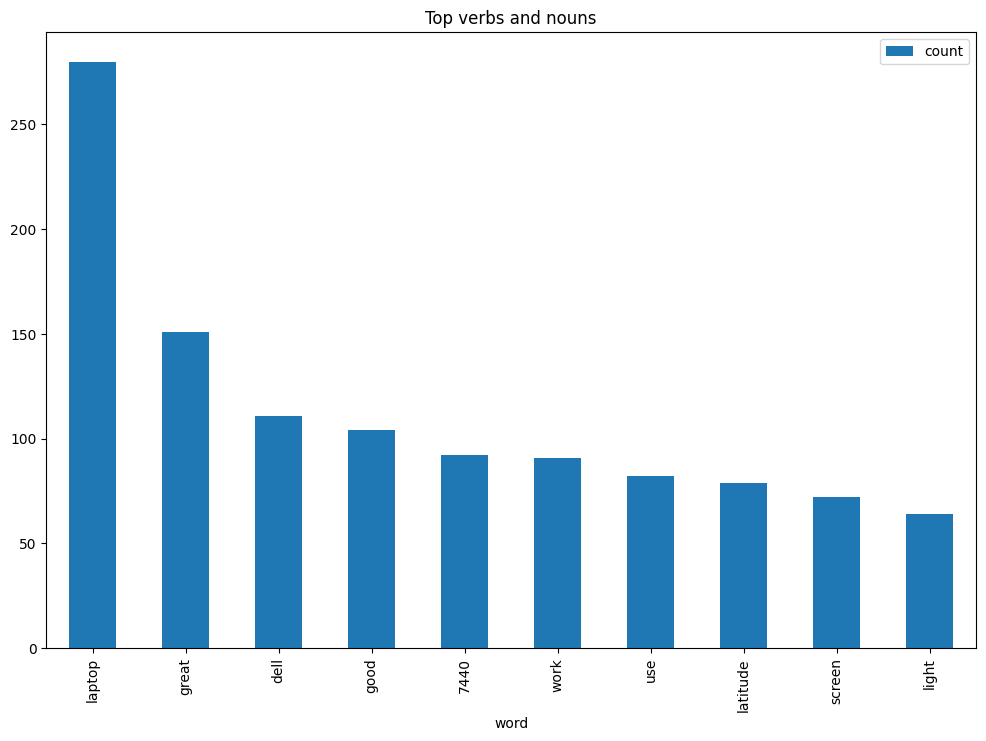

In [25]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns') 

In [26]:
# Importing packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

In [27]:
lower_join=' '.join(data['Review'])

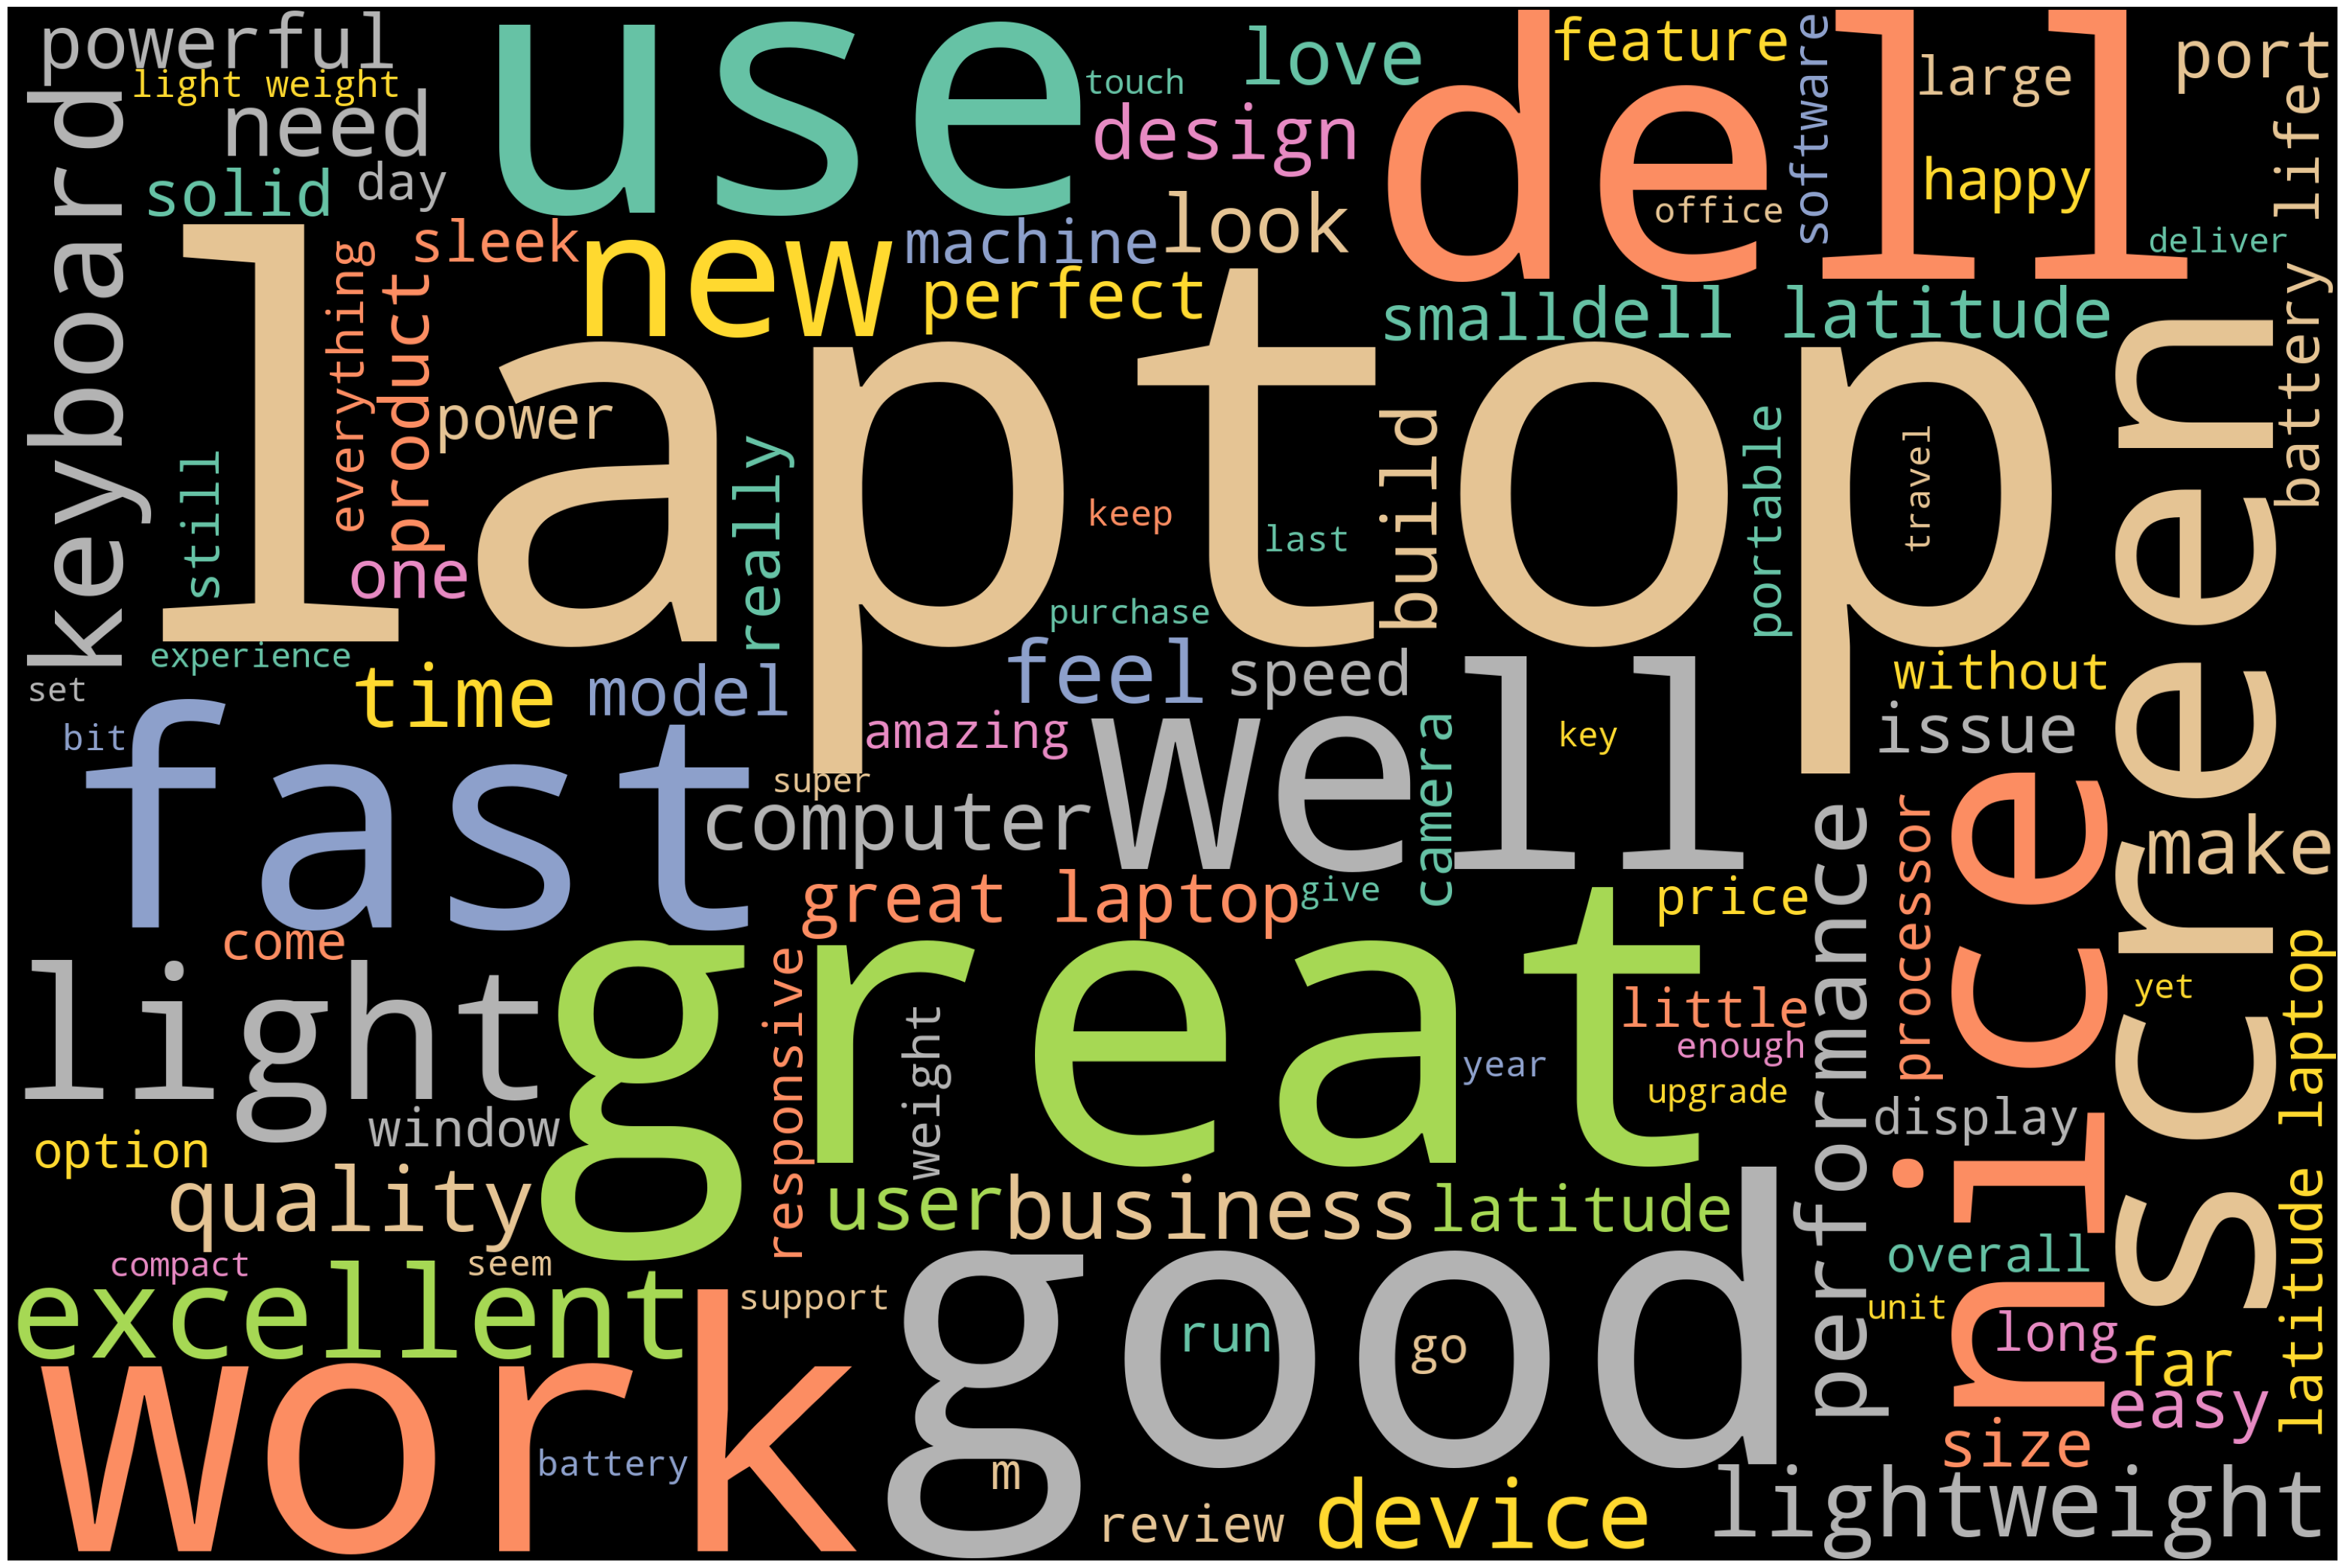

In [28]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(lower_join)
# Plot
plot_cloud(wordcloud) 

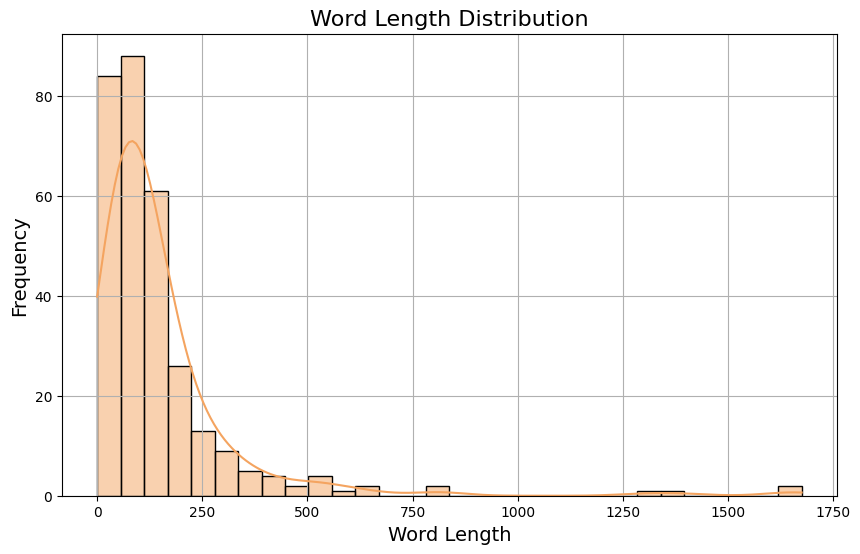

In [29]:
word_lengths = [len(word) for word in book]

plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=30, kde=True, color = "sandybrown")
plt.title('Word Length Distribution', fontsize=16)
plt.xlabel('Word Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.show()

sentiment analysis

In [30]:
data['polarity'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [31]:
data['polarity'].unique()

array([ 0.33958333,  0.30151515,  0.6       ,  0.575     ,  0.3625    ,
        0.55      ,  0.26666667,  0.68939394,  0.25952381,  0.425     ,
        0.41866667,  0.33333333,  1.        ,  0.35714286,  0.432     ,
        0.47666667,  0.5       ,  0.46666667,  0.04399892,  0.58333333,
        0.86666667,  0.7       ,  0.3       ,  0.8       ,  0.45      ,
        0.50285714,  0.28333333,  0.36666667,  0.        ,  0.13636364,
        0.31428571,  0.42      ,  0.4       ,  0.43333333,  0.35      ,
        0.36704545,  0.55      ,  0.6       ,  0.35      , -0.025     ,
        0.65      ,  0.7       ,  0.21666667,  0.1       ,  0.29916667,
        0.15983766,  0.49545455,  0.15909091,  0.31875   ,  0.21405724,
        0.39469697,  0.37222222,  0.20625   , -0.14791667,  0.38888889,
        0.25833333,  0.53333333,  0.48666667,  0.40666667,  0.04166667,
        0.08541667,  0.675     ,  0.46666667,  0.20666667,  0.53333333,
        0.1       ,  0.43129252,  0.62285714,  0.56666667,  0.35

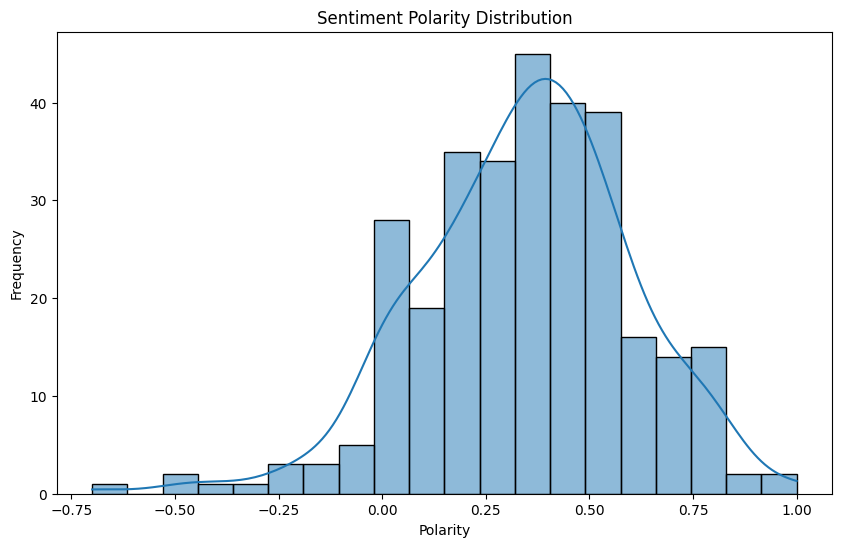

In [32]:
# Polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

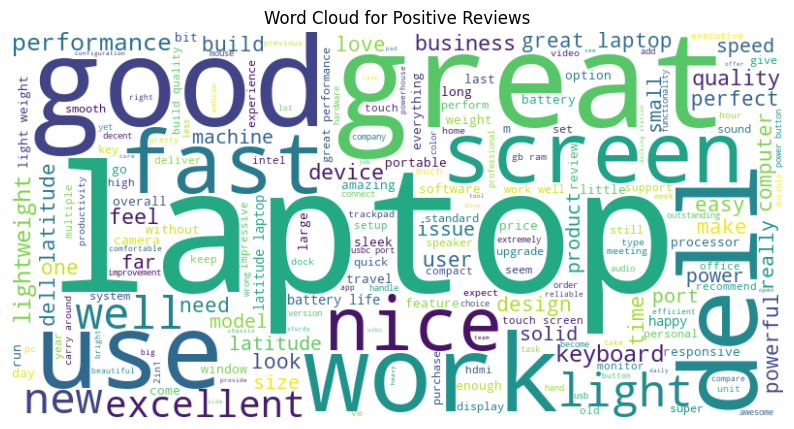

In [33]:
# Word cloud for positive reviews
positive_reviews = ' '.join(data[data['polarity'] > 0]['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

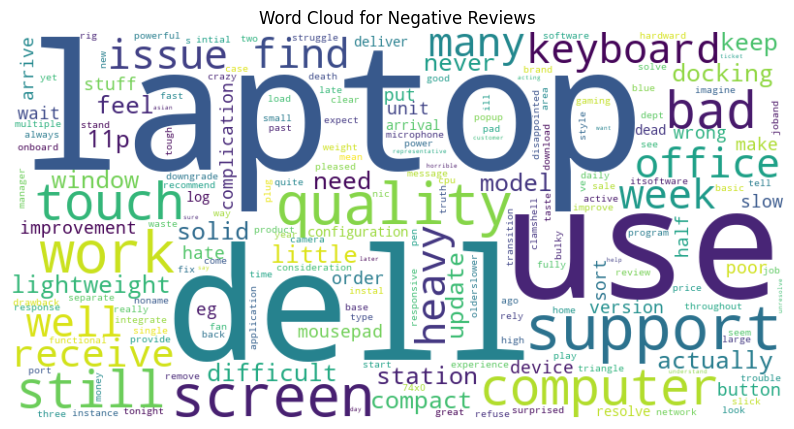

In [34]:
# Word cloud for negative reviews
negative_reviews = ' '.join(data[data['polarity'] < 0]['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [35]:
def sentiment_value(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'


In [36]:
data['sentiment']=data['polarity'].apply(sentiment_value)

In [37]:
data['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

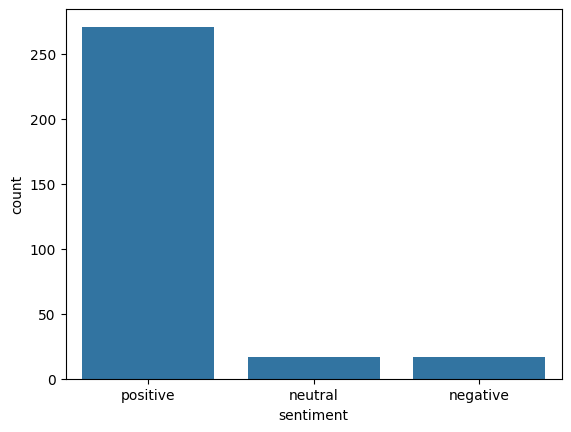

In [38]:
sns.countplot(x='sentiment',data=data)

<Axes: xlabel='polarity', ylabel='count'>

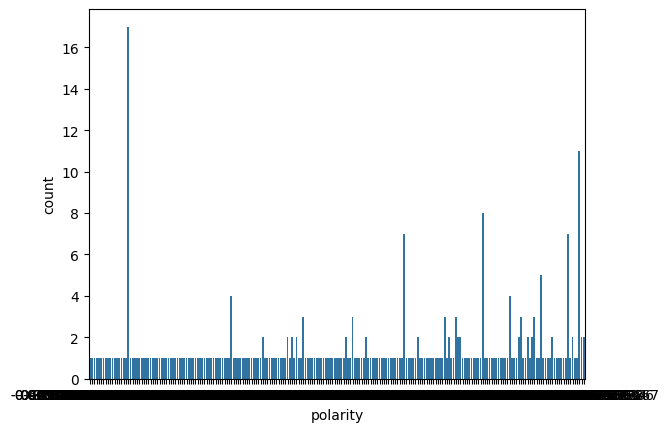

In [39]:
sns.countplot(x='polarity',data=data)

<Axes: xlabel='polarity', ylabel='Density'>

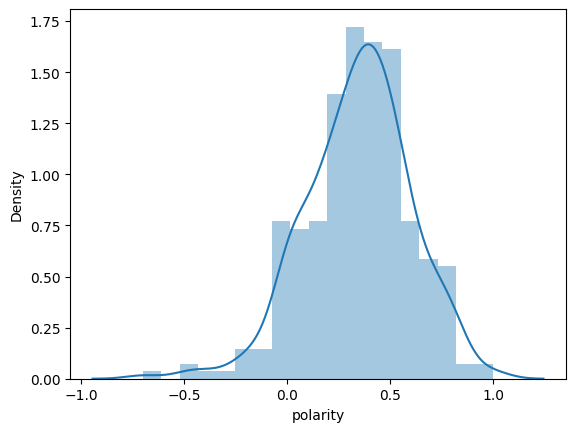

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['polarity'])               

In [41]:
# how many words are in the sentence?
data['word_count'] = data['Review'].str.split().apply(len)
data.head() 

,headline,reviewBody,ratingValue,Review,polarity,sentiment,word_count
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,super light efficient laptop super light effic...,0.339583,positive,17
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,new laptop great far love new look feel new la...,0.301515,positive,10
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,lightweight powerhouse great build quality exc...,0.600000,positive,25
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,great laptop work excellent laptop work proces...,0.575000,positive,13
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,practical solid laptop far good like hdmi usbc...,0.362500,positive,29


In [42]:
data.index.name = 'index'

<Axes: xlabel='index', ylabel='polarity'>

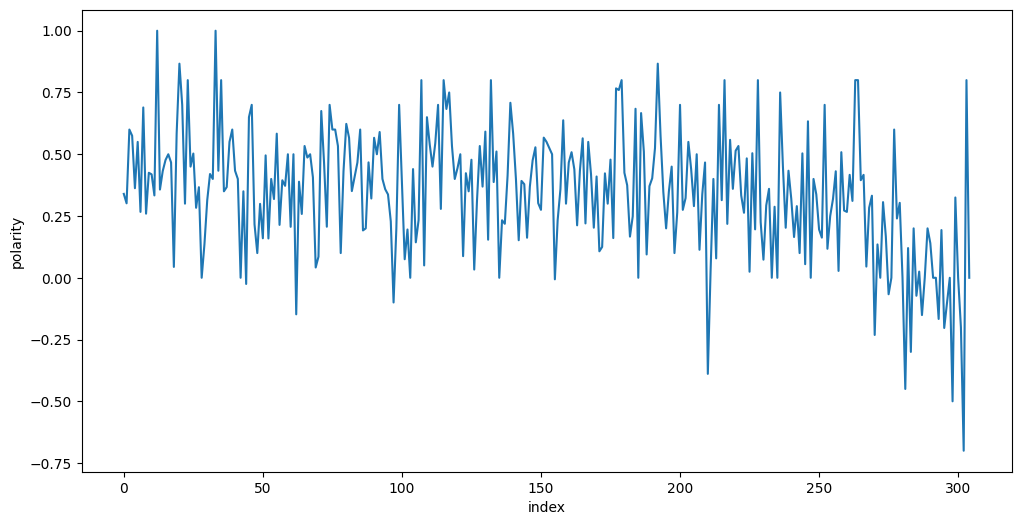

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(y='polarity',x='index',data=data)  

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='polarity'>

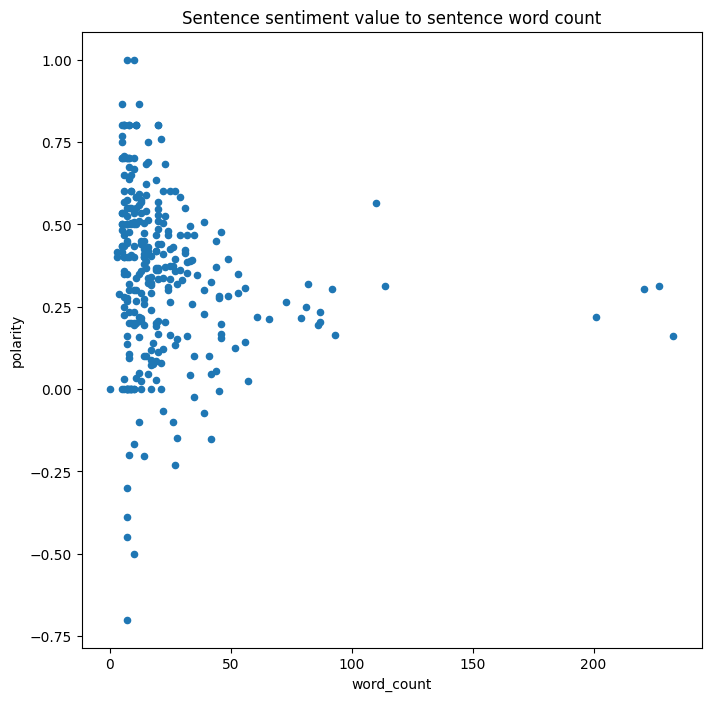

In [44]:
data.plot.scatter(x='word_count', y='polarity', figsize=(8,8), title='Sentence sentiment value to sentence word count') 

<Axes: >

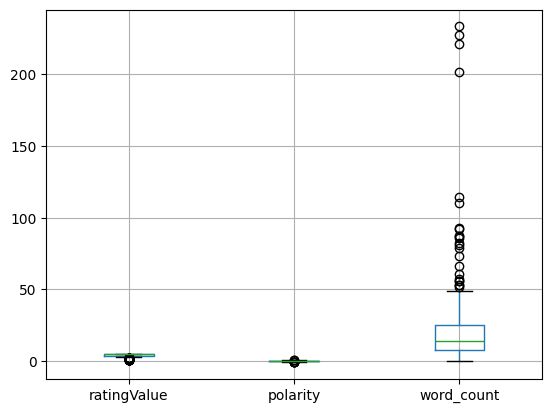

In [45]:
data.boxplot()

In [46]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['sentiment']=label.fit_transform(data['sentiment'])
data

,headline,reviewBody,ratingValue,Review,polarity,sentiment,word_count
index,,,,,,,
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,super light efficient laptop super light effic...,0.339583,2,17
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,new laptop great far love new look feel new la...,0.301515,2,10
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,lightweight powerhouse great build quality exc...,0.600000,2,25
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,great laptop work excellent laptop work proces...,0.575000,2,13
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,practical solid laptop far good like hdmi usbc...,0.362500,2,29
...,...,...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,faulty motherboard dell send laptop faulty mot...,0.000000,1,7
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,dead arrival laptop dead arrival still wait re...,-0.200000,0,8
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,bad quality bad quality overheat keyboardtrack...,-0.700000,0,7


In [47]:
data['sentiment'].value_counts()

sentiment
2    271
1     17
0     17
Name: count, dtype: int64

In [48]:
# data.drop(['headline','reviewBody','word_count','ratingValue','polarity'],axis=1,inplace=True)

In [49]:
data.shape

(305, 7)

<Axes: >

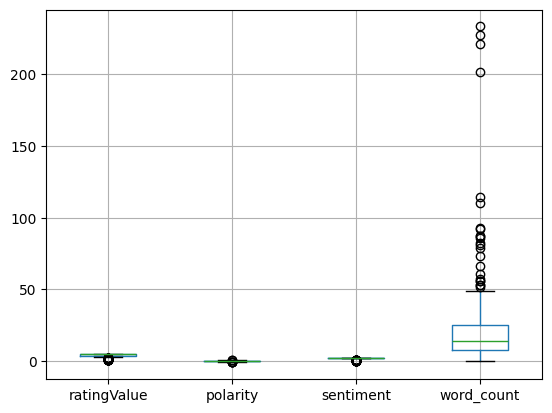

In [50]:
data.boxplot()  

Model Building

In [51]:
# Separate features (X) and target (y)
x = data['Review']# Features: 
y = data['sentiment']    
x

index
0      super light efficient laptop super light effic...
1      new laptop great far love new look feel new la...
2      lightweight powerhouse great build quality exc...
3      great laptop work excellent laptop work proces...
4      practical solid laptop far good like hdmi usbc...
                             ...                        
300    faulty motherboard dell send laptop faulty mot...
301    dead arrival laptop dead arrival still wait re...
302    bad quality bad quality overheat keyboardtrack...
303    hassles installation win 11 laptop come requir...
304    break device laptop break customer support hel...
Name: Review, Length: 305, dtype: object

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(x).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (213, 1539)
y train: (213,)
X test: (92, 1539)
y test: (92,)


In [55]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (305, 1539)
y shape: (305,)


In [56]:
y_train

index
72     2
15     2
10     2
164    2
224    2
      ..
188    2
71     2
106    2
270    0
102    2
Name: sentiment, Length: 213, dtype: int32

In [57]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorization=TfidfVectorizer()
# x_train_tfidf=vectorization.fit_transform(X_train).toarray()

In [58]:
# import pickle
# file=open('./model/minmax.pkl','wb')
# pickle.dump(cv,file)
# file.close()

Naive Bayes Clasiffier

In [59]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)    

MultinomialNB()

In [60]:
print("Training Accuracy :", nb_classifier.score(X_train, y_train))
print("Testing Accuracy :", nb_classifier.score(X_test, y_test))

Training Accuracy : 0.9577464788732394
Testing Accuracy : 0.8804347826086957


In [61]:
y_pred=nb_classifier.predict(X_test)
y_pred 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2])

In [62]:
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
naive_accuracy= accuracy_score(y_test, y_pred)
print(naive_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
cm=print(confusion_matrix(y_test, y_pred))
cm

0.8804347826086957

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.91      0.96      0.94        84

    accuracy                           0.88        92
   macro avg       0.30      0.32      0.31        92
weighted avg       0.83      0.88      0.85        92


Confusion Matrix:
[[ 0  0  4]
 [ 0  0  4]
 [ 2  1 81]]


In [63]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}
clf= GridSearchCV(nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [64]:
clf.best_params_

{'alpha': 1.5}

In [65]:
print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

Training Accuracy : 0.9530516431924883
Testing Accuracy : 0.9021739130434783


In [66]:
import pickle
file=open('vector.pkl','wb')
pickle.dump(cv,file)
file.close()

In [67]:
import pickle
file=open('model.pkl','wb')
pickle.dump(nb_classifier,file)
file.close()

In [ ]:
# Function to load the model and vectorizer
def load_model_and_vectorizer():
    with open("vector.pkl", "rb") as f:
        vectorizer = pickle.load(f)
    with open("model.pkl", "rb") as f:
        ensemble_model = pickle.load(f)
    return vectorizer, ensemble_model

# Function to get sentiment
def get_sentiment(reviewbody):
    vectorizer, ensemble_model = load_model_and_vectorizer()
    x = vectorizer.transform([reviewbody]).toarray()
    # Predicting sentiment
    y = ensemble_model.predict(x)
    return y[0]  # Return the first (and only) prediction

# Test the function with a positive review
review = input('Enter')
print(f"This is a {get_sentiment(review)} sentiment!")

Logistic Regression

In [70]:
X_train.shape,y_train.shape

((213, 1539), (213,))

In [71]:
# Initialize Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
Logistic= LogisticRegression(max_iter=1000, random_state=42)
# Train the classifier
Logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [72]:
print("Training Accuracy :", Logistic.score(X_train, y_train))
print("Testing Accuracy :", Logistic.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9130434782608695


In [73]:
# Predict sentiment on the test set
y_pred = Logistic.predict(X_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred)
print(log_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.9130434782608695

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.91      1.00      0.95        84

    accuracy                           0.91        92
   macro avg       0.30      0.33      0.32        92
weighted avg       0.83      0.91      0.87        92


Confusion Matrix:
[[ 0  0  4]
 [ 0  0  4]
 [ 0  0 84]]


In [74]:
parameters={'penalty':('l1','l2','elastic',None),'C':[1,10]}
Log_cv=GridSearchCV(Logistic,param_grid=parameters,cv=5)
Log_cv.fit(X_train,y_train) # spliting of the train to validation data

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [1, 10],
                         'penalty': ('l1', 'l2', 'elastic', None)})

In [75]:
Log_cv.best_params_

{'C': 1, 'penalty': None}

In [76]:
# Predict sentiment on the test set
y_pred = Log_cv.predict(X_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred)
print(log_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.9239130434782609

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         4
           2       0.92      1.00      0.96        84

    accuracy                           0.92        92
   macro avg       0.64      0.42      0.45        92
weighted avg       0.89      0.92      0.89        92


Confusion Matrix:
[[ 1  0  3]
 [ 0  0  4]
 [ 0  0 84]]


In [77]:
print("Training Accuracy :", Log_cv.score(X_train, y_train))
print("Testing Accuracy :", Log_cv.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9239130434782609


SVM

In [78]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
print("Training Accuracy :", SVM.score(X_train, y_train))
print("Testing Accuracy :", SVM.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9130434782608695


In [80]:
# Predict sentiment on the test set
y_pred = SVM.predict(X_test)

# Calculate accuracy
svm_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.9130434782608695

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         4
           2       0.92      0.99      0.95        84

    accuracy                           0.91        92
   macro avg       0.64      0.41      0.45        92
weighted avg       0.89      0.91      0.89        92


Confusion Matrix:
[[ 1  0  3]
 [ 0  0  4]
 [ 0  1 83]]


Hyper Parameter Tunning

In [81]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto']
}
SVM_cv = GridSearchCV(SVM, param_grid=param_grid, cv=5, scoring='accuracy')
SVM_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

Hyper Parameter Tunning

In [82]:
SVM_cv.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

In [83]:
SVM_cv.best_score_

0.8779623477297896

In [84]:
# Predict sentiment on the test set
y_pred = SVM_cv.predict(X_test)

# Calculate accuracy
svm_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.9130434782608695

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.91      1.00      0.95        84

    accuracy                           0.91        92
   macro avg       0.30      0.33      0.32        92
weighted avg       0.83      0.91      0.87        92


Confusion Matrix:
[[ 0  0  4]
 [ 0  0  4]
 [ 0  0 84]]


Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=100, random_state=42)
Rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
print("Training Accuracy :", Rf.score(X_train, y_train))
print("Testing Accuracy :", Rf.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9130434782608695


In [87]:
# Predict sentiment on the test set
y_pred = Rf.predict(X_test)

# Calculate accuracy
Rf_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

0.9130434782608695

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.91      1.00      0.95        84

    accuracy                           0.91        92
   macro avg       0.30      0.33      0.32        92
weighted avg       0.83      0.91      0.87        92


Confusion Matrix:
[[ 0  0  4]
 [ 0  0  4]
 [ 0  0 84]]


Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
Dt= DecisionTreeClassifier()
# Fit the model to the training data
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
print("Training Accuracy :", Dt.score(X_train, y_train))
print("Testing Accuracy :", Dt.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8586956521739131


In [90]:
# Predict sentiment on the test set
y_pred = Dt.predict(X_test)

# Calculate accuracy
Dt_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

0.9130434782608695

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.00      0.00      0.00         4
           2       0.92      0.93      0.92        84

    accuracy                           0.86        92
   macro avg       0.37      0.39      0.38        92
weighted avg       0.85      0.86      0.85        92


Confusion Matrix:
[[ 1  0  3]
 [ 0  0  4]
 [ 4  2 78]]


In [92]:
model=pd.DataFrame({
    'Model':['Naive bayes','Logistic Regression','SVM','Random Forest Classifier','Decision Tree'],
    'Score':[naive_accuracy,log_accuracy,svm_accuracy,Rf_accuracy,Dt_accuracy]
})
model.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Logistic Regression,0.923913
2,SVM,0.913043
3,Random Forest Classifier,0.913043
0,Naive bayes,0.880435
4,Decision Tree,0.858696


In [93]:
import pickle
file=open('vector.pkl','wb')
pickle.dump(cv,file)
file.close()

In [94]:
import pickle
file=open('Logistic.pkl','wb')
pickle.dump(Logistic,file)
file.close()

In [95]:
sentence_to_predict = X[304]

sentence = data.iloc[304]
predictions = Logistic.predict([sentence_to_predict])

sentiment_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

predicted_sentiment = sentiment_map[predictions[0]]
print(f"Sentence: '{sentence}' => Predicted Sentiment: {predicted_sentiment}")

Sentence: 'headline                                           Broken Device
reviewBody     Laptop is broken and Customer Support is not h...
ratingValue                                                  1.0
Review         break device laptop break customer support hel...
polarity                                                     0.0
sentiment                                                      1
word_count                                                     7
Name: 304, dtype: object' => Predicted Sentiment: Neutral


In [96]:
# Define individual models
nb_model = MultinomialNB(alpha=0.01)
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(probability=True)

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[
    ('nb', nb_model),
    ('lr', lr_model),
    ('svm', svm_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

NameError: name 'VotingClassifier' is not defined

In [ ]:
import pickle
file=open('vector.pkl','wb')
pickle.dump(cv,file)
file.close()

In [ ]:
import pickle
file=open('model.pkl','wb')
pickle.dump(ensemble_model,file)
file.close()

In [ ]:
# Function to load the model and vectorizer
def load_model_and_vectorizer():
    with open("vector.pkl", "rb") as f:
        vectorizer = pickle.load(f)
    with open("model.pkl", "rb") as f:
        ensemble_model = pickle.load(f)
    return vectorizer, ensemble_model

# Function to get sentiment
def get_sentiment(reviewbody):
    vectorizer, ensemble_model = load_model_and_vectorizer()
    x = vectorizer.transform([reviewbody]).toarray()
    # Predicting sentiment
    y = ensemble_model.predict(x)
    return y[0]  # Return the first (and only) prediction

# Test the function with a positive review
review = input('Enter ')
print(f"This is a {get_sentiment(review)} sentiment!")